HW4 Mult Linear Regression


In [248]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [249]:
# Load the training, validation, and test data
train_data = pd.read_csv('kc.train (2).data')
valid_data = pd.read_csv('kc.valid (3).data')
test_data = pd.read_csv('kc.test (1).data')

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {valid_data.shape}")
print(f"Test data shape: {test_data.shape}")
print("\nColumn names:")
print(train_data.columns.tolist())

Training data shape: (12901, 21)
Validation data shape: (4320, 21)
Test data shape: (4388, 21)

Column names:
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [250]:
# Preview the training data
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13T00:00:00Z,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09T00:00:00Z,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,2014-12-09T00:00:00Z,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,7237550310,2014-05-12T00:00:00Z,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,2008000270,2015-01-15T00:00:00Z,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [251]:
# Summary statistics
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.290100e+04,1.290100e+04,12901.000000,12901.000000,12901.000000,1.290100e+04,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000
mean,4.588573e+09,5.448722e+05,3.376405,2.124428,2091.909077,1.535601e+04,1.502093,0.007984,0.244942,3.407333,7.671033,1799.252229,292.656848,1971.237656,85.547787,98078.230680,47.559333,-122.214537,1990.276955,12887.007596
std,2.883271e+09,3.721148e+05,0.911093,0.774288,917.512294,4.152263e+04,0.542564,0.088999,0.781471,0.649416,1.182425,827.766240,445.224998,29.361164,404.272840,53.593783,0.139293,0.140651,684.790688,27639.639984
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.130400e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.080000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469800,-122.329000,1490.000000,5120.000000
50%,3.904930e+09,4.532500e+05,3.000000,2.250000,1930.000000,7.626000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.232000,1850.000000,7632.000000
75%,7.338220e+09,6.480000e+05,4.000000,2.500000,2570.000000,1.073900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,570.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2370.000000,10080.000000
max,9.895000e+09,5.570000e+06,10.000000,7.500000,9640.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.316000,5790.000000,858132.000000


Categorical variables: Waterfront/View/Condition 

In [252]:
# Define categorical predictors
categorical_vars = ['waterfront', 'view', 'condition']

# Check unique values for each categorical variable
for var in categorical_vars:
    print(f"{var}: {sorted(train_data[var].unique())}")
    print(f"  Value counts:\n{train_data[var].value_counts().sort_index()}\n")

waterfront: [np.int64(0), np.int64(1)]
  Value counts:
waterfront
0    12798
1      103
Name: count, dtype: int64

view: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
  Value counts:
view
0    11572
1      212
2      604
3      312
4      201
Name: count, dtype: int64

condition: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
  Value counts:
condition
1      18
2      98
3    8407
4    3367
5    1011
Name: count, dtype: int64



Box/Whisker Plot

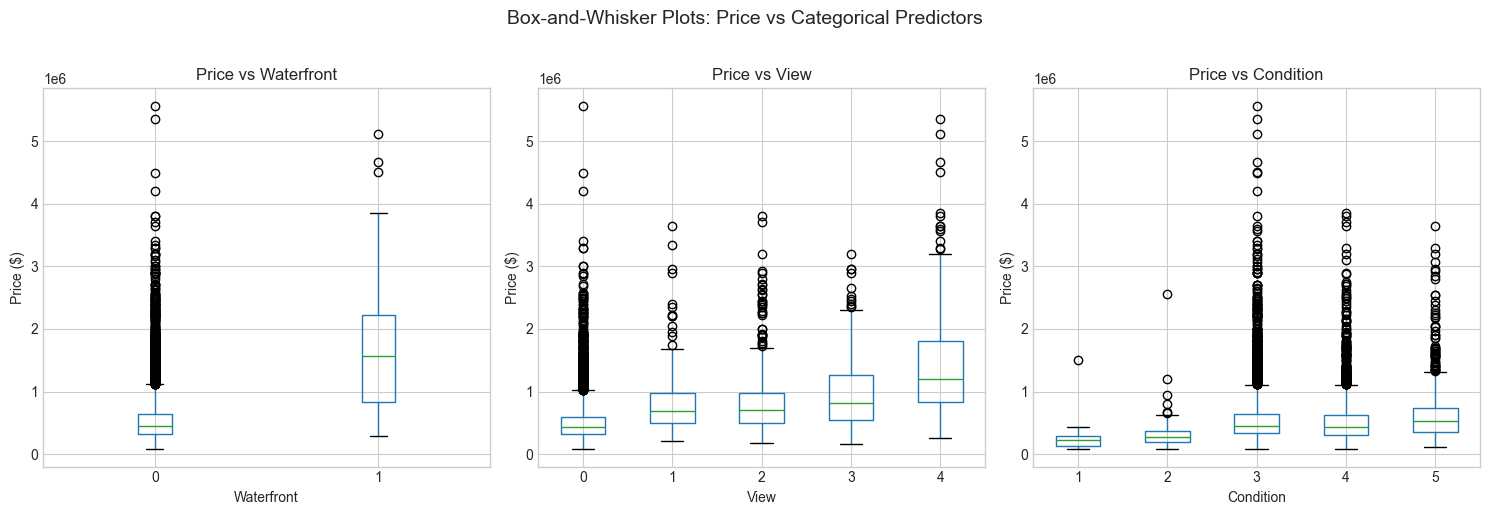

In [253]:
# Create box plots for each categorical variable vs price
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, var in enumerate(categorical_vars):
    train_data.boxplot(column='price', by=var, ax=axes[idx])
    axes[idx].set_title(f'Price vs {var.title()}')
    axes[idx].set_xlabel(var.title())
    axes[idx].set_ylabel('Price ($)')

plt.suptitle('Box-and-Whisker Plots: Price vs Categorical Predictors', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Box and Whisker Plot Analysis:

Waterfront and price are related. Houses with a waterfront have a significantly higher median price.


View and price are related. The "higher" the view rating the higher the median price. 

Condition and price relationship doesnt appear to be as strong as the view or waterfront relationship. Once a home is condition "3" the median price is stable. Conditions "1" and "2" are both lower than 3-5. 


Fitting a linear regression model for price as a function of the predictor. 

In [254]:

print("="*70)
print("MODEL 1: Price ~ Waterfront")
print("="*70)

# Convert to categorical for proper treatment
model_waterfront = smf.ols('price ~ C(waterfront)', data=train_data).fit()
print(model_waterfront.summary())

MODEL 1: Price ~ Waterfront
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):          4.07e-230
Time:                        20:24:30   Log-Likelihood:            -1.8326e+05
No. Observations:               12901   AIC:                         3.665e+05
Df Residuals:                   12899   BIC:                         3.665e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercep

The intercept is the average baseline price for the houses without waterfront access and is the baseline price. The coefficent is the additional price premium for waterfront properties. Houses with waterfronts cost about that much more on average than nonwaterfront homes.


In [255]:
# Model 2: Price ~ View
print("="*70)
print("MODEL 2: Price ~ View")
print("="*70)

model_view = smf.ols('price ~ C(view)', data=train_data).fit()
print(model_view.summary())

MODEL 2: Price ~ View
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     722.9
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:24:30   Log-Likelihood:            -1.8248e+05
No. Observations:               12901   AIC:                         3.650e+05
Df Residuals:                   12896   BIC:                         3.650e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.97e+05   

The intercept in this model represents the average price for houses without a view. Each coefficent is the price difference compared to the baseline.


In [256]:
# Model 3: Price ~ Condition
print("="*70)
print("MODEL 3: Price ~ Condition")
print("="*70)

model_condition = smf.ols('price ~ C(condition)', data=train_data).fit()
print(model_condition.summary())

MODEL 3: Price ~ Condition
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.81
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           8.29e-19
Time:                        20:24:30   Log-Likelihood:            -1.8374e+05
No. Observations:               12901   AIC:                         3.675e+05
Df Residuals:                   12896   BIC:                         3.675e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  

The intercept is the average price for houses with the baseline condition level of 1. The coefficents represent the difference compared to the average when conditions=1. 


---
Problem 2 MLR

I picked sqft_living and sqft_lot as the two cont predictors.


In [257]:
# Define continuous variables for Problem 2
continuous_vars_p2 = ['sqft_living', 'sqft_lot']

# Fit multiple linear regression model
print("="*70)
print("MULTIPLE LINEAR REGRESSION: Price ~ sqft_living + sqft_lot")
print("="*70)

model_mlr = smf.ols('price ~ sqft_living + sqft_lot', data=train_data).fit()
print(model_mlr.summary())

MULTIPLE LINEAR REGRESSION: Price ~ sqft_living + sqft_lot
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     6344.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:24:30   Log-Likelihood:            -1.7937e+05
No. Observations:               12901   AIC:                         3.587e+05
Df Residuals:                   12898   BIC:                         3.588e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [258]:
# For comparison, fit simple linear regression models
print("\n" + "="*70)
print("SIMPLE LINEAR REGRESSION: Price ~ sqft_living")
print("="*70)
model_sqft = smf.ols('price ~ sqft_living', data=train_data).fit()
print(f"Intercept: {model_sqft.params['Intercept']:.2f}")
print(f"sqft_living coefficient: {model_sqft.params['sqft_living']:.2f}")
print(f"R-squared: {model_sqft.rsquared:.4f}")

print("\n" + "="*70)
print("SIMPLE LINEAR REGRESSION: Price ~ sqft_lot")
print("="*70)
model_lot = smf.ols('price ~ sqft_lot', data=train_data).fit()
print(f"Intercept: {model_lot.params['Intercept']:.2f}")
print(f"sqft_lot coefficient: {model_lot.params['sqft_lot']:.2f}")
print(f"R-squared: {model_lot.rsquared:.4f}")


SIMPLE LINEAR REGRESSION: Price ~ sqft_living
Intercept: -51908.57
sqft_living coefficient: 285.28
R-squared: 0.4948

SIMPLE LINEAR REGRESSION: Price ~ sqft_lot
Intercept: 532491.93
sqft_lot coefficient: 0.81
R-squared: 0.0081


Problem 2.1 Coefficent Interpretation and Comparison

MLR Coefficents
The intercept is the predicted price when sqft living and sqft lot are 0 which of course isnt actually possible..
Sqft living (when sqft lot is held constant)  is how much each additional sqft of living space increases the price.
Sqft lot (when sqft living is held constant) is how much each additional sqft of lot size is associated with this much of an increase in price.

With SLR the sqft living coefficent contains the effect of the living space and any other correlated variables that have indirect effects. Here we controlled for variables when determining the coefficent and we only see the direct effect of that coefficent. 



In [259]:
# Print coefficient comparison
print("COEFFICIENT COMPARISON")
print("="*70)
print(f"{'Variable':<20} {'Simple LR':<20} {'Multiple LR':<20}")
print("-"*70)
print(f"{'sqft_living':<20} {model_sqft.params['sqft_living']:<20.2f} {model_mlr.params['sqft_living']:<20.2f}")
print(f"{'sqft_lot':<20} {model_lot.params['sqft_lot']:<20.2f} {model_mlr.params['sqft_lot']:<20.2f}")

COEFFICIENT COMPARISON
Variable             Simple LR            Multiple LR         
----------------------------------------------------------------------
sqft_living          285.28               287.66              
sqft_lot             0.81                 -0.30               


Averaged Scatterplots


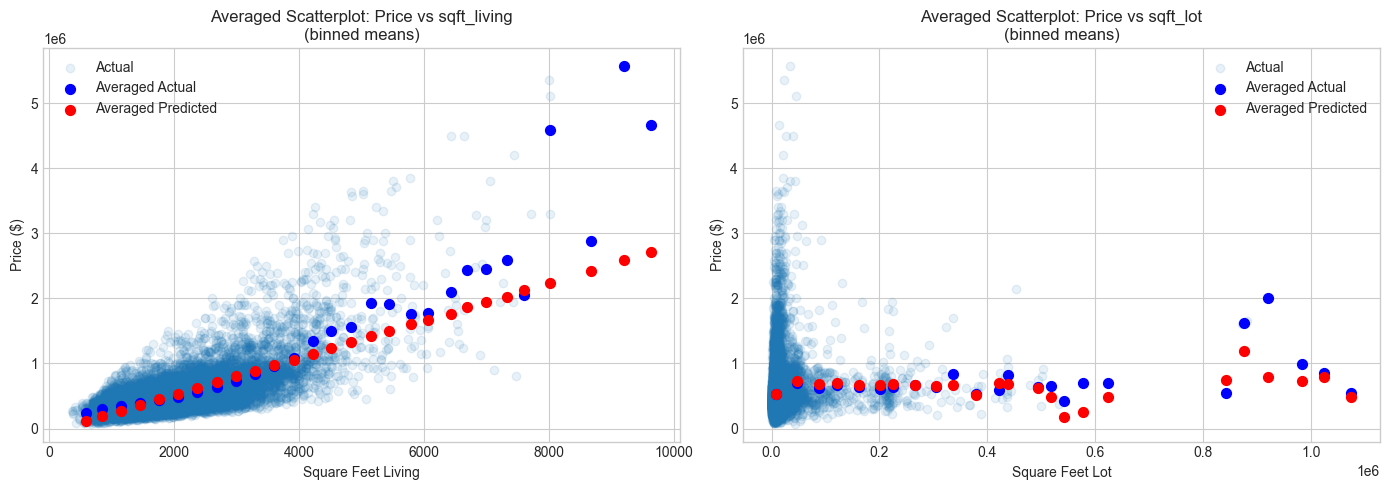

In [260]:
# Create averaged scatterplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get predicted values
train_data['predicted_price'] = model_mlr.predict(train_data)

# Averaged scatterplot 1: Price vs sqft_living (binned means; averaging over sqft_lot)
train_data['sqft_living_bins'] = pd.cut(train_data['sqft_living'], bins=30)
sqft_avg = train_data.groupby('sqft_living_bins').agg({
    'price': 'mean',
    'predicted_price': 'mean',
    'sqft_living': 'mean'
}).dropna()

axes[0].scatter(train_data['sqft_living'], train_data['price'], alpha=0.1, label='Actual')
axes[0].scatter(sqft_avg['sqft_living'], sqft_avg['price'], color='blue', s=50, label='Averaged Actual')
axes[0].scatter(sqft_avg['sqft_living'], sqft_avg['predicted_price'], color='red', s=50, label='Averaged Predicted')
axes[0].set_xlabel('Square Feet Living')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Averaged Scatterplot: Price vs sqft_living\n(binned means)')
axes[0].legend()

# Averaged scatterplot 2: Price vs sqft_lot (binned means; averaging over sqft_living)
train_data['sqft_lot_bins'] = pd.cut(train_data['sqft_lot'], bins=30)
lot_avg = train_data.groupby('sqft_lot_bins').agg({
    'price': 'mean',
    'predicted_price': 'mean',
    'sqft_lot': 'mean'
}).dropna()

axes[1].scatter(train_data['sqft_lot'], train_data['price'], alpha=0.1, label='Actual')
axes[1].scatter(lot_avg['sqft_lot'], lot_avg['price'], color='blue', s=50, label='Averaged Actual')
axes[1].scatter(lot_avg['sqft_lot'], lot_avg['predicted_price'], color='red', s=50, label='Averaged Predicted')
axes[1].set_xlabel('Square Feet Lot')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Averaged Scatterplot: Price vs sqft_lot\n(binned means)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Clean up temporary columns
train_data.drop(['predicted_price', 'sqft_living_bins', 'sqft_lot_bins'], axis=1, inplace=True)


Average scatterplots (binned means) demonstrate how the model tracks the relationship between each predictor and price. Here we visualize price vs sqft_living and price vs sqft_lot, and compare the averaged actual prices to the averaged model predictions across bins.

Residuals and response plots

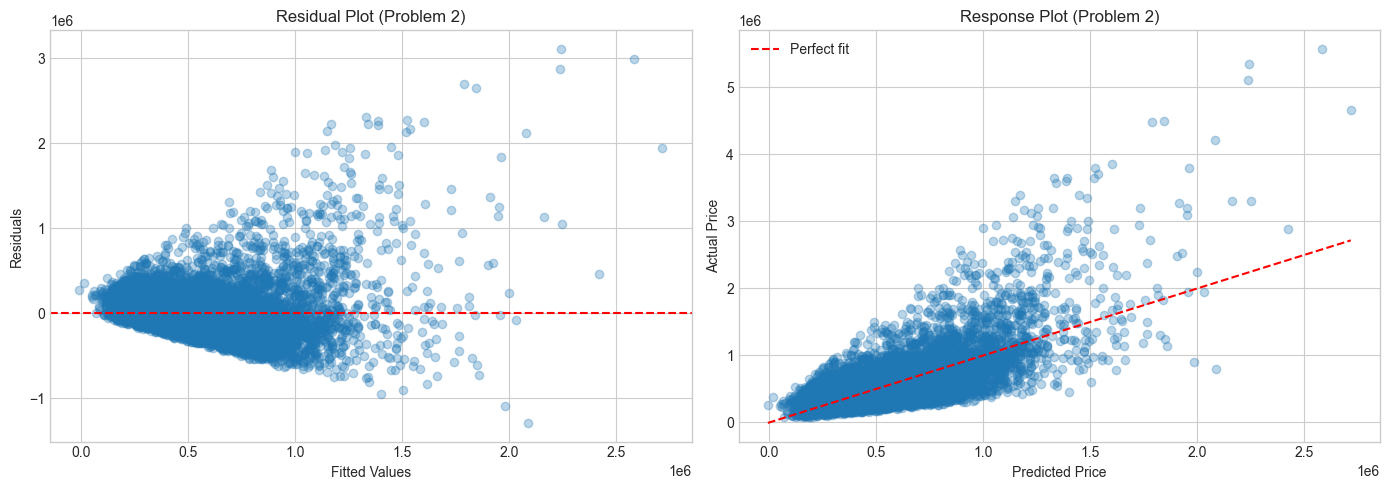

In [261]:
# Get residuals and fitted values
residuals_mlr = model_mlr.resid
fitted_mlr = model_mlr.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(fitted_mlr, residuals_mlr, alpha=0.3)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot (Problem 2)')

# Response plot (Actual vs Predicted)
axes[1].scatter(fitted_mlr, train_data['price'], alpha=0.3)
axes[1].plot([fitted_mlr.min(), fitted_mlr.max()], [fitted_mlr.min(), fitted_mlr.max()], 'r--', label='Perfect fit')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Actual Price')
axes[1].set_title('Response Plot (Problem 2)')
axes[1].legend()

plt.tight_layout()
plt.show()

The residual plots shape is notable for heteroscedasticity. As the "fitted" values increase the residuals seem to spread out and appear funnel shaped. Therefore the varience of errors is not constant, but I think its probably safe to say the model can predict the less expensive homes pretty well. This makes sense to me as more expensive homes may have something unique about them that can significantly change the price.

The response plot follows a diagnoal line with clustering around lower priced homes. As the price of the house increases more of the homes are above the line and the model is underestimating the cost of the more expensive homes. THe R2 was 0.49 so it explains 49% of the variation in price. 


MLR w/ mixed variables sqft living (continious) and waterfront (categorical.)


In [262]:

print("="*70)
print("MIXED MODEL: Price ~ sqft_living + waterfront")
print("="*70)

model_mixed = smf.ols('price ~ sqft_living + C(waterfront)', data=train_data).fit()
print(model_mixed.summary())

MIXED MODEL: Price ~ sqft_living + waterfront
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     7414.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:24:31   Log-Likelihood:            -1.7885e+05
No. Observations:               12901   AIC:                         3.577e+05
Df Residuals:                   12898   BIC:                         3.577e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Coefficient Interpretation and Comparison 

THe intercept is the price of a home without a waterfront and with 0 square feet of living space. 
Sqft living coefficent is the increase in price for each additional square foot when waterfront is held constant. 
Waterfront coefficent is the difference in price between houses with and without waterfronts while keeping sqft living constant.

In [263]:

print("COEFFICIENT COMPARISON")
print("="*70)
print(f"\nsqft_living coefficient:")
print(f"  Simple LR (HW3): {model_sqft.params['sqft_living']:.2f}")
print(f"  Mixed Model:     {model_mixed.params['sqft_living']:.2f}")

print(f"\nwaterfront coefficient:")
print(f"  Simple LR (Problem 1): {model_waterfront.params['C(waterfront)[T.1]']:.2f}")
print(f"  Mixed Model:           {model_mixed.params['C(waterfront)[T.1]']:.2f}")

COEFFICIENT COMPARISON

sqft_living coefficient:
  Simple LR (HW3): 285.28
  Mixed Model:     275.90

waterfront coefficient:
  Simple LR (Problem 1): 1168521.63
  Mixed Model:           841935.55


In the mixed model the sqft living coefficent decreased from $285 to $276. So when using the simple linear regresion model where the value of the waterfront is NOT controlled for we see some hidden value in square foot living that must be including the value of the waterfront. 

The waterfront coefficent drops from $1.2 million to $842k when using the mixed model. Using simple linear regression the waterfront home adds $1.2 million on average. Controlling for the sqft living of the home in the mixed model the waterfront feature adds around $842k to a home. This is probably because houses with waterfronts are larger which confounds the simple linear regression models results. 


Scatterplot w/ categorical levels

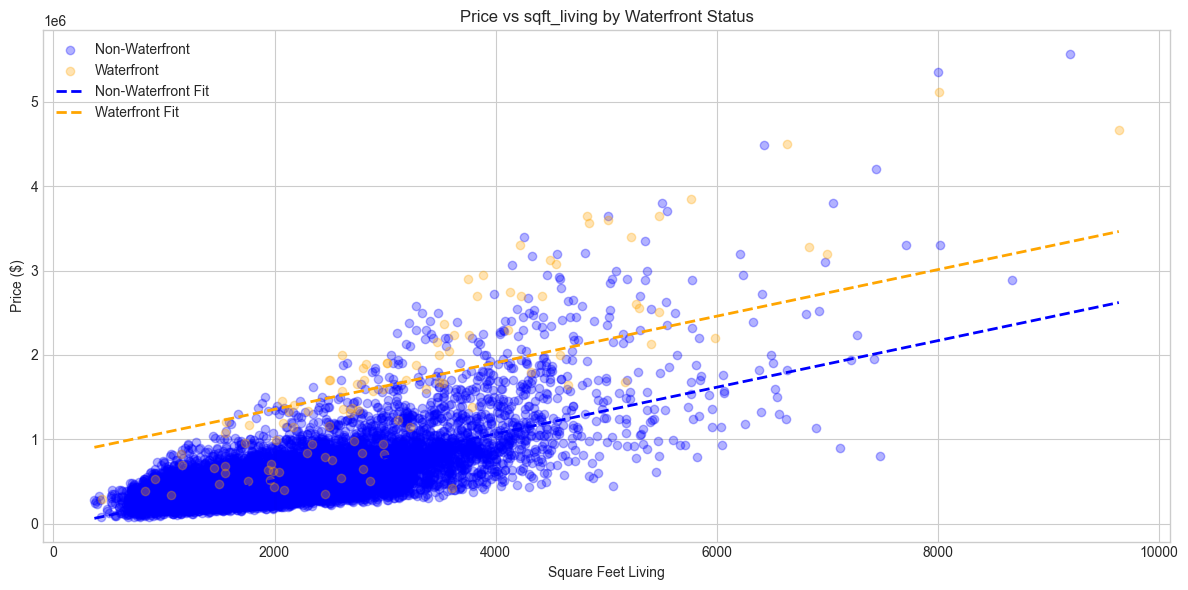

In [264]:
# Scatterplot showing different regression lines by waterfront status
fig, ax = plt.subplots(figsize=(12, 6))

# Plot points by waterfront status
colors = {0: 'blue', 1: 'orange'}
labels = {0: 'Non-Waterfront', 1: 'Waterfront'}

for wf in [0, 1]:
    subset = train_data[train_data['waterfront'] == wf]
    ax.scatter(subset['sqft_living'], subset['price'], alpha=0.3, 
               c=colors[wf], label=labels[wf])

# Plot regression lines
x_range = np.linspace(train_data['sqft_living'].min(), train_data['sqft_living'].max(), 100)

# Get coefficients
intercept = model_mixed.params['Intercept']
sqft_coef = model_mixed.params['sqft_living']
wf_coef = model_mixed.params['C(waterfront)[T.1]']

# Non-waterfront line
y_nowf = intercept + sqft_coef * x_range
ax.plot(x_range, y_nowf, color='blue', linewidth=2, linestyle='--', label='Non-Waterfront Fit')

# Waterfront line
y_wf = (intercept + wf_coef) + sqft_coef * x_range
ax.plot(x_range, y_wf, color='orange', linewidth=2, linestyle='--', label='Waterfront Fit')

ax.set_xlabel('Square Feet Living')
ax.set_ylabel('Price ($)')
ax.set_title('Price vs sqft_living by Waterfront Status')
ax.legend()
plt.tight_layout()
plt.show()


The scatterplot demonstrates the relationship betwen sqft living and price for homes with an without a waterfront. As the sqft living increases the price increases for both groups. The regression line for the waterfront homes is higher than than the line for homes without a waterfront for all sqft living values. The difference between the lines is the waterfront coefficent. The slope of the lines are the same therefore they are parallel. THe model cant be completely accurate as the cost of additional sqft is not linear within the groups or between the groups. 


Residual and response plots

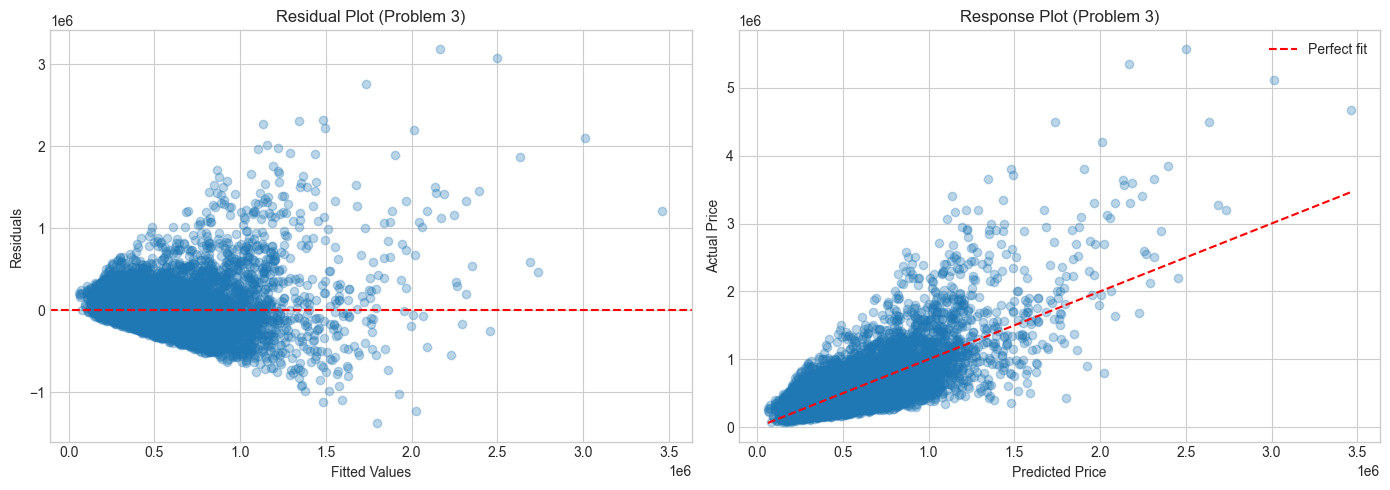

In [265]:
# Residual and response plots for mixed model
residuals_mixed = model_mixed.resid
fitted_mixed = model_mixed.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(fitted_mixed, residuals_mixed, alpha=0.3)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot (Problem 3)')

# Response plot
axes[1].scatter(fitted_mixed, train_data['price'], alpha=0.3)
axes[1].plot([fitted_mixed.min(), fitted_mixed.max()], [fitted_mixed.min(), fitted_mixed.max()], 'r--', label='Perfect fit')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Actual Price')
axes[1].set_title('Response Plot (Problem 3)')
axes[1].legend()

plt.tight_layout()
plt.show()

The residual plot is notable for heterscedasticity as the fitted values increase and it looks generally similar to the previous residual plot using sqft living and sqft lot. I think the response plot loosk around the same as well and generally follows the regression line with the exception of higher priced homes. This might just mean that sqft living is the primary predictor of house price, but waterfront had such a large effect on house price compared to sqft lot I am suprised we dont see an obvious visual difference. 


Multiple Linear Regression 

Continuous: Sqft living, bathrooms, bedrooms, sqft lot

Categorical: waterfront, view, condition

In [266]:
# 7 predictors
print("="*70)
print("FULL MODEL: Price ~ 4 continuous + 3 categorical predictors")
print("="*70)

formula_full = 'price ~ sqft_living + bathrooms + bedrooms + sqft_lot + C(waterfront) + C(view) + C(condition)'
model_full = smf.ols(formula_full, data=train_data).fit()
print(model_full.summary())

FULL MODEL: Price ~ 4 continuous + 3 categorical predictors
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1352.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:24:32   Log-Likelihood:            -1.7824e+05
No. Observations:               12901   AIC:                         3.565e+05
Df Residuals:                   12887   BIC:                         3.566e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Diagnostic plot

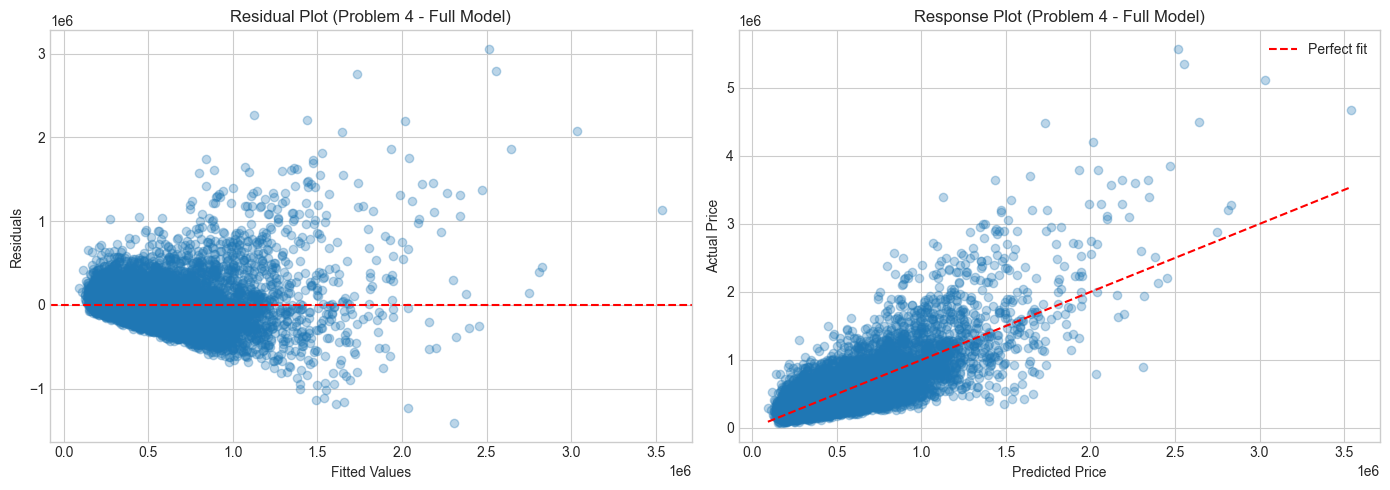

In [267]:
# Residual and response plots for full model
residuals_full = model_full.resid
fitted_full = model_full.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(fitted_full, residuals_full, alpha=0.3)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot (Problem 4 - Full Model)')

# Response plot
axes[1].scatter(fitted_full, train_data['price'], alpha=0.3)
axes[1].plot([fitted_full.min(), fitted_full.max()], [fitted_full.min(), fitted_full.max()], 'r--', label='Perfect fit')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Actual Price')
axes[1].set_title('Response Plot (Problem 4 - Full Model)')
axes[1].legend()

plt.tight_layout()
plt.show()

THe residual and response plot of the full model appear to have slightly less dispersion of the data points, but there is still heteroscedasticity at the higher values. The points in the response plot are more clustered around the regression line. It makes sense that as we add more variables we can better approximate the data. 

Quant. evaluation

In [268]:
# Calculate comparison metrics for all three models
def get_model_metrics(model, name):
    return {
        'Model': name,
        'F-statistic': model.fvalue,
        'R-squared': model.rsquared,
        'Adj. R-squared': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic
    }

metrics_list = [
    get_model_metrics(model_mlr, 'Problem 2 (2 continuous)'),
    get_model_metrics(model_mixed, 'Problem 3 (1 cont + 1 cat)'),
    get_model_metrics(model_full, 'Problem 4 (4 cont + 3 cat)')
]

comparison_df = pd.DataFrame(metrics_list)
print("MODEL COMPARISON")
print("="*90)
print(comparison_df.to_string(index=False))

MODEL COMPARISON
                     Model  F-statistic  R-squared  Adj. R-squared           AIC           BIC
  Problem 2 (2 continuous)  6343.604919   0.495881        0.495802 358741.175529 358763.570709
Problem 3 (1 cont + 1 cat)  7413.721062   0.534796        0.534723 357704.760327 357727.155508
Problem 4 (4 cont + 3 cat)  1351.884001   0.576941        0.576515 356501.603211 356606.114052


Multiple linear regression model used the most predictors and as explained the 58% of the variation in price. Looking back at the previous residual and response plots this fits. I really couldnt see a difference between the sqft living and sqft lot graphs and the sqft living and waterfront graphs. However the sqft living and sqft lot graphs had noticably higher residuals and points further away from the regression line. 

Predictive performance on validation data

In [269]:
# Calculate predictive metrics on validation data
def calc_predictive_metrics(model, data, y_col='price'):
    y_true = data[y_col]
    y_pred = model.predict(data)
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Predictive R-squared
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    r2_pred = 1 - (ss_res / ss_tot)
    
    return rmse, r2_pred

# Problem 2 model predictions
rmse_p2, r2_p2 = calc_predictive_metrics(model_mlr, valid_data)

# Problem 3 model predictions
rmse_p3, r2_p3 = calc_predictive_metrics(model_mixed, valid_data)

# Problem 4 model predictions
rmse_p4, r2_p4 = calc_predictive_metrics(model_full, valid_data)

print("PREDICTIVE PERFORMANCE ON VALIDATION DATA")
print("="*70)
print(f"{'Model':<30} {'RMSE':>15} {'Pred. R-squared':>20}")
print("-"*70)
print(f"{'Problem 2 (2 continuous)':<30} {rmse_p2:>15,.2f} {r2_p2:>20.4f}")
print(f"{'Problem 3 (1 cont + 1 cat)':<30} {rmse_p3:>15,.2f} {r2_p3:>20.4f}")
print(f"{'Problem 4 (4 cont + 3 cat)':<30} {rmse_p4:>15,.2f} {r2_p4:>20.4f}")

PREDICTIVE PERFORMANCE ON VALIDATION DATA
Model                                     RMSE      Pred. R-squared
----------------------------------------------------------------------
Problem 2 (2 continuous)            254,096.81               0.4871
Problem 3 (1 cont + 1 cat)          241,794.25               0.5355
Problem 4 (4 cont + 3 cat)          234,410.18               0.5635


The multivariable regression model with 7 variables had the lowest RMSE and the highest predictive accuracy. 


Gradient descent

compute the least squares optimum using gradient descent



Function for GD

In [270]:
def gradient(a, b, X, Y):
    """
    Gradient of the sum-of-squares cost function C = sum_i (y_i - (a + b x_i))^2.

    Returns mean gradients to make the learning rate less sensitive to dataset size.
    """
    X = np.asarray(X, dtype=float)
    Y = np.asarray(Y, dtype=float)
    n = X.size
    if n == 0:
        raise ValueError("X must contain at least one value")
    residuals = Y - (a + b * X)
    g0 = np.mean(-2.0 * residuals)
    g1 = np.mean(-2.0 * X * residuals)
    return g0, g1

function for GD

In [271]:
def linear_regression_grad_descent(a, b, eta, X, Y, tol, max_iterations=200000):
    """
    Find optimal linear regression params (intercept a, slope b) using gradient descent.

    Uses mean gradients (see gradient()) and includes basic divergence checks.
    """
    a0 = float(a)
    b0 = float(b)
    
    for iterations in range(1, max_iterations + 1):
        g0, g1 = gradient(a0, b0, X, Y)
        
        # Divergence/NaN guard
        if not (np.isfinite(g0) and np.isfinite(g1) and np.isfinite(a0) and np.isfinite(b0)):
            print("Warning: gradient descent diverged (non-finite values encountered)")
            return np.nan, np.nan
        
        # Update parameters
        a0 = a0 - eta * g0
        b0 = b0 - eta * g1
        
        # Convergence check (gradient norm)
        magnitude = np.sqrt(g0**2 + g1**2)
        if magnitude < tol:
            print(f"Converged in {iterations} iterations")
            return a0, b0
    
    print(f"Warning: Maximum iterations ({max_iterations}) reached")
    return a0, b0

test


In [272]:
# Test 
toy_x = [1, 2, 3]
toy_y = [3, 5, 7]  # y = 1 + 2x, so a=1, b=2

print("Test")
print("="*50)
print("Expected: a=1, b=2")
print()

# Test with different initial guesses
test_cases = [
    (0, 0),
    (0.5, 1.5),
    (2, 3),
    (-1, 0)
]

for a_init, b_init in test_cases:
    print(f"\nInitial guess: a={a_init}, b={b_init}")
    a_opt, b_opt = linear_regression_grad_descent(
        a=a_init, b=b_init, 
        eta=0.01,  # Learning rate
        X=toy_x, Y=toy_y, 
        tol=1e-6   # Tolerance
    )
    print(f"Result: a={a_opt:.6f}, b={b_opt:.6f}")

Test
Expected: a=1, b=2


Initial guess: a=0, b=0
Converged in 4232 iterations
Result: a=0.999996, b=2.000002

Initial guess: a=0.5, b=1.5
Converged in 4584 iterations
Result: a=0.999996, b=2.000002

Initial guess: a=2, b=3
Converged in 4872 iterations
Result: a=1.000004, b=1.999998

Initial guess: a=-1, b=0
Converged in 5160 iterations
Result: a=0.999996, b=2.000002


In [273]:
# Apply to King County house price data
print("\n" + "="*70)
print("APPLYING TO KING COUNTY DATA: Price ~ sqft_living")
print("="*70)
X_kc = train_data['sqft_living'].values
Y_kc = train_data['price'].values

# answer from statsmodels for comparison
model_compare = smf.ols('price ~ sqft_living', data=train_data).fit()
print(f"\nStatsmodels result:")
print(f"  Intercept: {model_compare.params['Intercept']:.4f}")
print(f"  sqft_living: {model_compare.params['sqft_living']:.4f}")


APPLYING TO KING COUNTY DATA: Price ~ sqft_living

Statsmodels result:
  Intercept: -51908.5695
  sqft_living: 285.2804


In [274]:
# Standardize the data
X_mean = X_kc.mean()
X_std = X_kc.std()
Y_mean = Y_kc.mean()
Y_std = Y_kc.std()

X_scaled = (X_kc - X_mean) / X_std
Y_scaled = (Y_kc - Y_mean) / Y_std

print("\nGradient Descent on Standardized Data:")
a_scaled, b_scaled = linear_regression_grad_descent(
    a=0, b=0,
    eta=0.01,
    X=X_scaled, Y=Y_scaled,
    tol=1e-6,
    max_iterations=200000
 )

b_original = (Y_std * b_scaled) / X_std
a_original = Y_mean + Y_std * a_scaled - b_original * X_mean

print(f"\nGradient Descent result (original scale):")
print(f"  Intercept: {a_original:.4f}")
print(f"  sqft_living: {b_original:.4f}")

print(f"\nComparison:")
print(f"  Statsmodels Intercept: {model_compare.params['Intercept']:.4f}")
print(f"  Gradient Descent Intercept: {a_original:.4f}")
print(f"  Difference: {abs(model_compare.params['Intercept'] - a_original):.4f}")
print(f"\n  Statsmodels sqft_living: {model_compare.params['sqft_living']:.4f}")
print(f"  Gradient Descent sqft_living: {b_original:.4f}")
print(f"  Difference: {abs(model_compare.params['sqft_living'] - b_original):.6f}")


Gradient Descent on Standardized Data:
Converged in 702 iterations

Gradient Descent result (original scale):
  Intercept: -51908.1559
  sqft_living: 285.2803

Comparison:
  Statsmodels Intercept: -51908.5695
  Gradient Descent Intercept: -51908.1559
  Difference: 0.4135

  Statsmodels sqft_living: 285.2804
  Gradient Descent sqft_living: 285.2803
  Difference: 0.000198


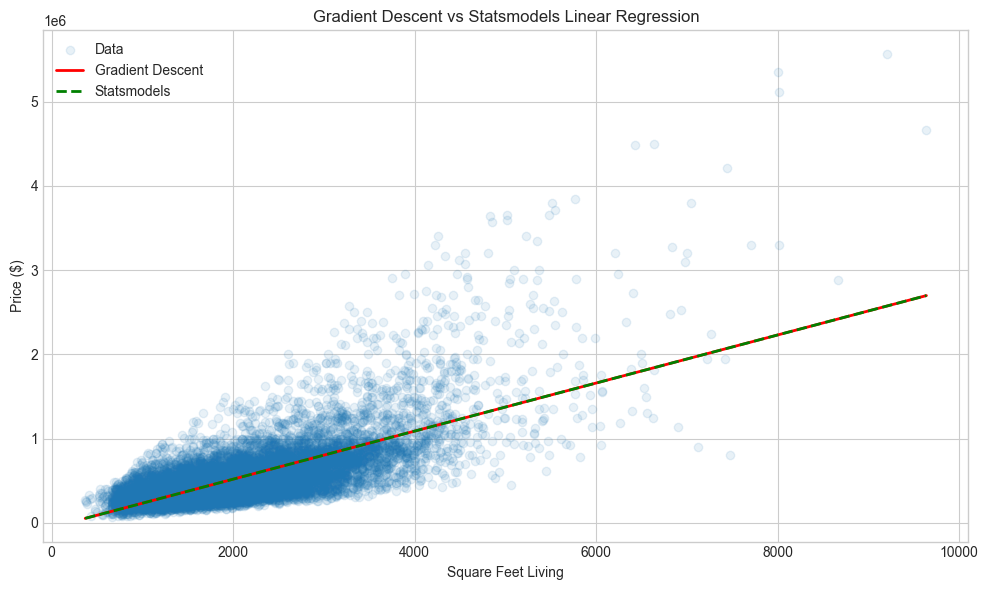

In [275]:
# Visualize the gradient descent result
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of data
ax.scatter(X_kc, Y_kc, alpha=0.1, label='Data')

# Regression line from gradient descent
x_line = np.linspace(X_kc.min(), X_kc.max(), 100)
y_line_gd = a_original + b_original * x_line
y_line_sm = model_compare.params['Intercept'] + model_compare.params['sqft_living'] * x_line

ax.plot(x_line, y_line_gd, 'r-', linewidth=2, label='Gradient Descent')
ax.plot(x_line, y_line_sm, 'g--', linewidth=2, label='Statsmodels')

ax.set_xlabel('Square Feet Living')
ax.set_ylabel('Price ($)')
ax.set_title('Gradient Descent vs Statsmodels Linear Regression')
ax.legend()
plt.tight_layout()
plt.show()